In [199]:
import pandas as pd
import numpy as np

In [200]:
# Cria um dicionário
dados = {'Estado': ['Santa Catarina', 'Rio de Janeiro', 'Tocantins', 'Bahia', 'Minas Gerais'], 
         'Ano': [2004, 2005, 2006, 2007, 2008], 
         'Taxa Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}

In [201]:
#Criando dataframe, reorganizando as colunas
df = pd.DataFrame(dados, columns=['Estado', 'Taxa Desemprego', 'Ano'])
df

,Estado,Taxa Desemprego,Ano
0,Santa Catarina,1.5,2004
1,Rio de Janeiro,1.7,2005
2,Tocantins,1.6,2006
3,Bahia,2.4,2007
4,Minas Gerais,2.7,2008


In [202]:
#Criando um DF com index e colunas novas
df2 = pd.DataFrame(dados,
                   columns = ['Estado', 'Taxa Desemprego', 'Taxa Crescimento', 'Ano'],
                   index= [f'estado{x}' for x in range(1,6)])
df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,NaN,2004
estado2,Rio de Janeiro,1.7,NaN,2005
estado3,Tocantins,1.6,NaN,2006
estado4,Bahia,2.4,NaN,2007
estado5,Minas Gerais,2.7,NaN,2008


In [203]:
#Imprime os valores do dataframe
df2.values

#Imprime o os tipos de cada coluna do DF
df2.dtypes

#Imprime as colunas do DF
df2.columns

Index(['Estado', 'Taxa Desemprego', 'Taxa Crescimento', 'Ano'], dtype='object')

In [204]:
# Imprimi uma coluna
df2['Estado']

#Imprimindo mais de uma coluna e retornando em formato DF
df2[['Taxa Desemprego', 'Ano']]

#Retorna os index do DF
df2.index

#Filtra pelo index
df2.filter(items = ['estado3'], axis=0)

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado3,Tocantins,1.6,NaN,2006


In [205]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [206]:
df2['Taxa Crescimento'] = np.arange(50, 55)


In [207]:
#Verifica se tem algum valor nulo
df2.isna()

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,False,False,False,False
estado2,False,False,False,False
estado3,False,False,False,False
estado4,False,False,False,False
estado5,False,False,False,False


In [208]:
#Cortando DF's
df2['estado2':'estado5']

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado2,Rio de Janeiro,1.7,51,2005
estado3,Tocantins,1.6,52,2006
estado4,Bahia,2.4,53,2007
estado5,Minas Gerais,2.7,54,2008


In [209]:
df2[df2['Taxa Desemprego'] < 2]

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,Santa Catarina,1.5,50,2004
estado2,Rio de Janeiro,1.7,51,2005
estado3,Tocantins,1.6,52,2006


In [210]:
df2[['Estado', 'Taxa Crescimento']]

,Estado,Taxa Crescimento
estado1,Santa Catarina,50
estado2,Rio de Janeiro,51
estado3,Tocantins,52
estado4,Bahia,53
estado5,Minas Gerais,54


In [211]:
#Lendo um dataset
df3 = pd.read_csv("dataset.csv")

In [212]:
df3.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [213]:
df3.isna().sum()

df3[df3['Quantidade'].isna()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.96,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,NaN


In [214]:
#Gera uma lista sendo o indice 0 o que mais aparece no DF
moda = df3['Quantidade'].value_counts().index[0]
moda

np.float64(3.0)

In [215]:
#Preencher os valores NA
# df3['Quantidade'].fillna(value=3, inplace=True)

#As novas versões esse comando sera mudado para
df3.fillna({'Quantidade': moda}, inplace=True)

In [216]:
df3[df3['Quantidade'].isna()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade


In [217]:
#Usando o query para filtros
df4 = df3.query('200 < Valor_Venda < 300')

In [218]:
df4.describe()

,Valor_Venda,Quantidade
count,675.000000,675.000000
mean,246.331494,3.998519
std,28.209379,2.331248
min,200.064000,1.000000
25%,221.024000,2.000000
50%,243.160000,3.000000
75%,271.764000,5.000000
max,299.990000,14.000000


In [219]:
#Fazendo um multi filtro
#Verifica qual linha possui a coluna quantidade com os itens dentro do colchete
df3[df3['Quantidade'].isin([5,7,9])]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
...,...,...,...,...,...,...,...,...,...,...,...
9974,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-AR-10004752,Office Supplies,Blackstonian Pencils,18.6900,7.0
9977,US-2016-103674,2016-12-06,AP-10720,Home Office,United States,West,OFF-FA-10003467,Office Supplies,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0
9981,CA-2017-163566,2017-08-03,TB-21055,Consumer,United States,East,OFF-LA-10004484,Office Supplies,Avery 476,16.5200,5.0
9982,US-2016-157728,2016-09-22,RC-19960,Consumer,United States,Central,OFF-PA-10002195,Office Supplies,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.5600,7.0


In [220]:
#Pegando os 10 primeiros
df3[df3['Quantidade'].isin([5,7,9])][:10]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
21,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AR-10000246,Office Supplies,Newell 318,19.4600,7.0
22,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AP-10001492,Office Supplies,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7.0
27,US-2015-150630,2015-09-17,TB-21520,Consumer,United States,East,FUR-BO-10004834,Furniture,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.5440,7.0
36,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,FUR-FU-10003664,Furniture,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5.0


In [221]:
#Utilizando o group by com o agg
#Será selecionada as colunas 'Segmento', 'Regiao', 'Valor_Venda', agrupada por segmento e regias e então retornar o valor da media, desvio e contagem de cada regiao por segmento
df3[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Segmento', 'Regiao']).agg(['mean', 'std', 'count'])

Valor_Venda                   
                           mean          std count
Segmento    Regiao                                
Consumer    Central  207.946728   587.906523  1212
            East     238.875539   633.371169  1469
            South    233.390180   559.346824   838
            West     217.033955   551.997547  1672
Corporate   Central  234.763466   818.947521   673
            East     228.516929   530.001654   877
            South    238.992025   586.176947   510
            West     235.265911   471.288764   960
Home Office Central  208.248046   371.009180   438
            East     253.911805   722.777318   502
            South    272.996329  1404.798466   272
            West     239.442692   529.242737   571

In [222]:
#Usando Base string
df3[df3.Segmento.str.startswith('Con')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


In [223]:
# Fazemos o split da coluna e extraímos o item na posição 2 (índice 1)
df3['Ano'] = df3['ID_Pedido'].str.split('-').str[1]
df3['Ano']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Ano, Length: 9994, dtype: object

In [224]:
#Remove os numero 2 e 0 da coluna
df3['Data_Pedido'].str.lstrip('20')

0       16-11-08
1       16-11-08
2       16-06-12
3       15-10-11
4       15-10-11
          ...   
9989    14-01-21
9990    17-02-26
9991    17-02-26
9992    17-02-26
9993    17-05-04
Name: Data_Pedido, Length: 9994, dtype: object

In [225]:
# Substituímos os caracteres CG por AX na coluna 'ID_Cliente'
df3['ID_Cliente'] = df3['ID_Cliente'].str.replace('CG', 'AX')
df3['ID_Cliente']

0       AX-12520
1       AX-12520
2       DV-13045
3       SO-20335
4       SO-20335
          ...   
9989    TB-21400
9990    DB-13060
9991    DB-13060
9992    DB-13060
9993    CC-12220
Name: ID_Cliente, Length: 9994, dtype: object

In [226]:
# Concatenando strings
df3['Pedido_Segmento'] = df3['ID_Pedido'].str.cat(df3['Segmento'], sep = '-')
df3['Pedido_Segmento']

0        CA-2016-152156-Consumer
1        CA-2016-152156-Consumer
2       CA-2016-138688-Corporate
3        US-2015-108966-Consumer
4        US-2015-108966-Consumer
                  ...           
9989     CA-2014-110422-Consumer
9990     CA-2017-121258-Consumer
9991     CA-2017-121258-Consumer
9992     CA-2017-121258-Consumer
9993     CA-2017-119914-Consumer
Name: Pedido_Segmento, Length: 9994, dtype: object

In [227]:
import sklearn

In [228]:
#A biblioteca sklearn tem como importa o dataset mais usado para aprendizado o Iris dataset
data = sklearn.datasets.load_iris()

iris_df = pd.DataFrame(data['data'], columns=data['feature_names'])
iris_df['species'] = data['target']

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

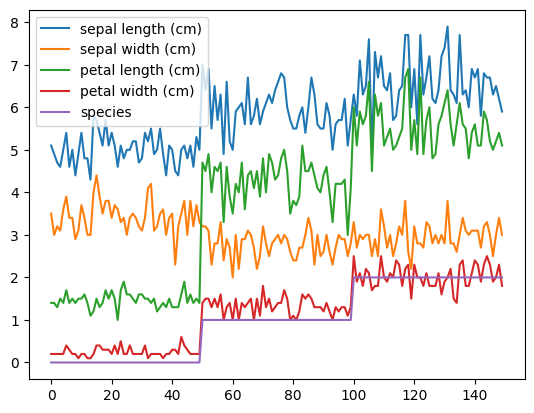

In [229]:
# criando um grafico de linhas com as variaveis do dataframe
iris_df.plot()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

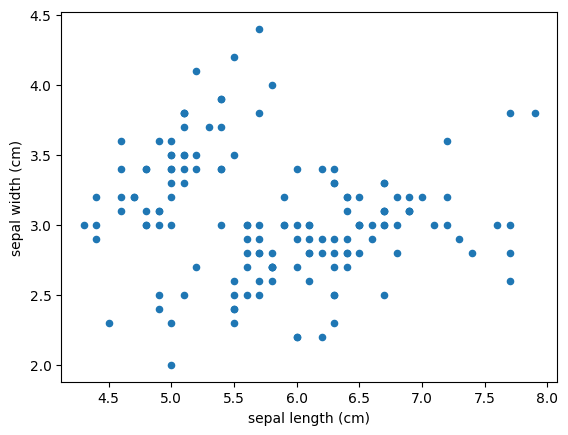

In [230]:
#Imprimi um gráfico de pontos passando como coordenada x = 'sepal length (cm)', y = 'sepal width (cm)' 
iris_df.plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')


<Axes: >

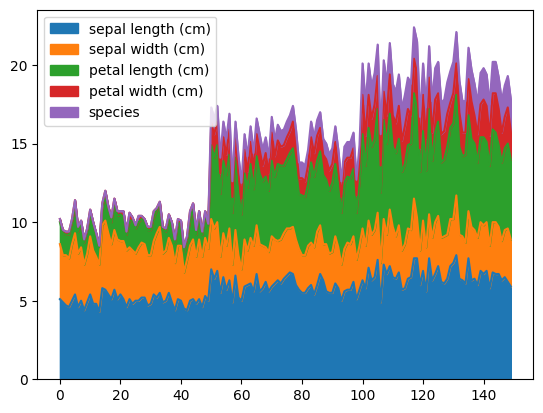

In [231]:
#Criando um gráfico de area
iris_df[iris_df.columns].plot.area()

<Axes: xlabel='species'>

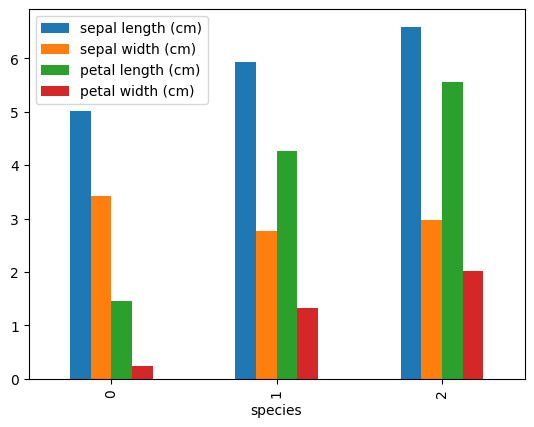

In [232]:
#Grafico de barra com a quantidade de especies
iris_df.groupby('species').mean().plot.bar()

<Axes: ylabel='sepal length (cm)'>

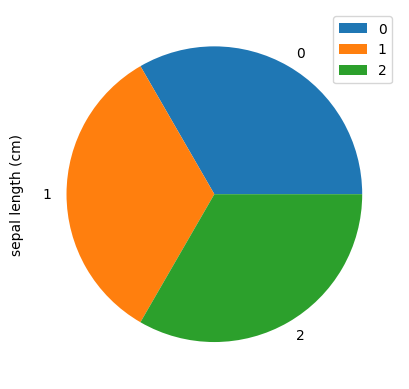

In [233]:
#Grafico de pizza com a contagem das especies
iris_df.groupby('species').count().plot.pie(y = 'sepal length (cm)')

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

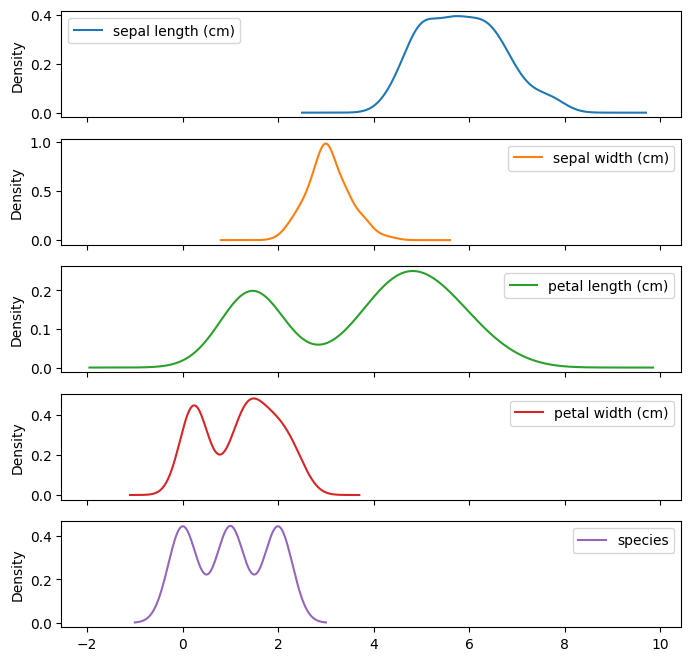

In [236]:
#Mais exemplos
iris_df.plot.kde(subplots=True, figsize = (8,8))

<Axes: >

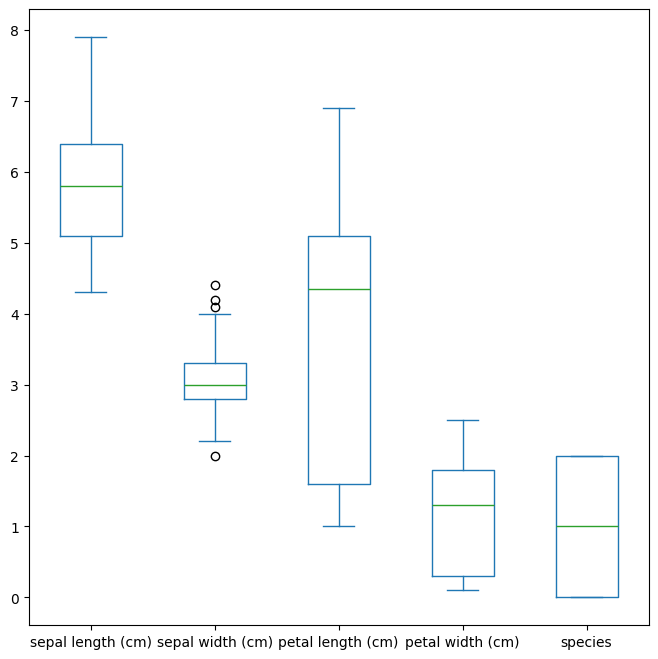

In [237]:
iris_df[iris_df.columns].plot.box(figsize = (8,8))